___

# Micro Challenge Exploration


check also: https://medium.com/saturdays-ai/my-data-science-template-for-python-59a67cba4290

# Import Libraries

In [407]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # For numerical columns, use histogram, boxplot, and density plot
        plt.subplot(1, 2, 1)
        sns.histplot(df[column_name].dropna(), kde=True, color='skyblue')
        plt.title(f'Histogram of {column_name}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.title(f'Boxplot of {column_name}')
        
    else:
        # For categorical columns, use bar plot
        sns.countplot(y=df[column_name], palette="viridis", order=df[column_name].value_counts().index)
        plt.title(f'Bar Plot of {column_name}')
        
    plt.tight_layout()
    plt.show()

In [408]:
#Reduce dataframe memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [409]:
import pandas as pd

def summarize_dataframe(df):
    summary_list = []  # List to store summary information

    for column in df.columns:
        unique_values = df[column].unique()
        summary_list.append({
            'Column': column,
            'Data Type': df[column].dtype,
            'Unique Values': df[column].nunique(),
            'Missing Values': df[column].isnull().sum(),
            'Sample Unique Values': unique_values[:5] if len(unique_values) > 5 else unique_values
        })

    # Convert the list of dictionaries into a DataFrame
    summary_df = pd.DataFrame(summary_list)

    return summary_df


In [410]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [411]:
import os
print(os.getcwd())
os.chdir(r'C:\Users\49176\Desktop\projects\data-science-project-template\data\01_raw')
print(os.getcwd())

C:\Users\49176\Desktop\projects\data-science-project-template\data\01_raw
C:\Users\49176\Desktop\projects\data-science-project-template\data\01_raw


In [412]:
df = pd.read_csv('winequality-red.csv')
#df = reduce_mem_usage(df)

## Do data exploration here first and clean data

#### for data types, cat cardinality and what you want to keep

In [413]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [414]:
print(df.shape)

(1599, 12)


In [415]:
df.describe().round()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


In [416]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [418]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [419]:
# Generate the summary for your dataframe
summary_df = summarize_dataframe(df)
summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

,Column,Data Type,Unique Values,Missing Values,Sample Unique Values
0,fixed acidity,float64,96,0,[ 7.4 7.8 11.2 7.9 7.3]
1,volatile acidity,float64,143,0,[0.7 0.88 0.76 0.28 0.66]
2,citric acid,float64,80,0,[0. 0.04 0.56 0.06 0.02]
3,residual sugar,float64,91,0,[1.9 2.6 2.3 1.8 1.6]
4,chlorides,float64,153,0,[0.076 0.098 0.092 0.075 0.069]
5,free sulfur dioxide,float64,60,0,[11. 25. 15. 17. 13.]
6,total sulfur dioxide,float64,144,0,[34. 67. 54. 60. 40.]
7,density,float64,436,0,[0.9978 0.9968 0.997 0.998 0.9964]
8,pH,float64,89,0,[3.51 3.2 3.26 3.16 3.3 ]
9,sulphates,float64,96,0,[0.56 0.68 0.65 0.58 0.46]


In [420]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

#check for count of missing values in each columns
df[cols_with_missing].isnull().sum()

Series([], dtype: float64)

In [328]:
df.describe().round()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


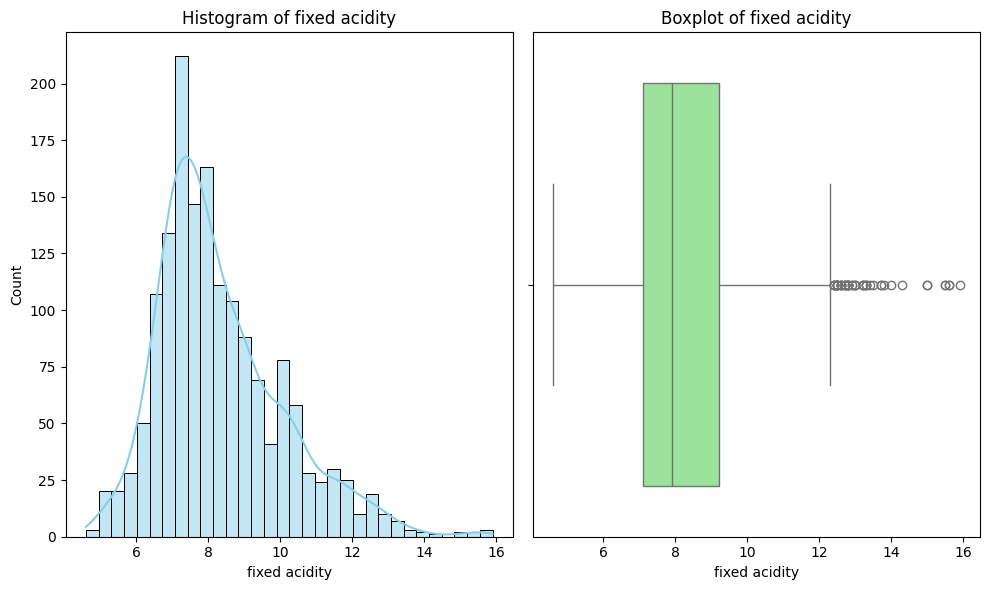

In [329]:
plot_distribution(df, 'fixed acidity')

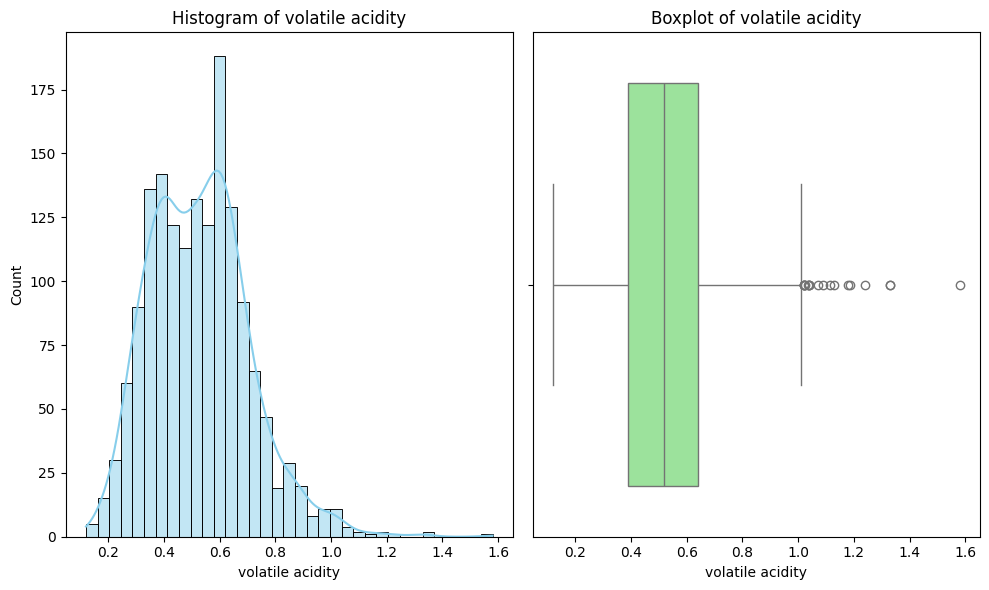

In [330]:
plot_distribution(df, 'volatile acidity')

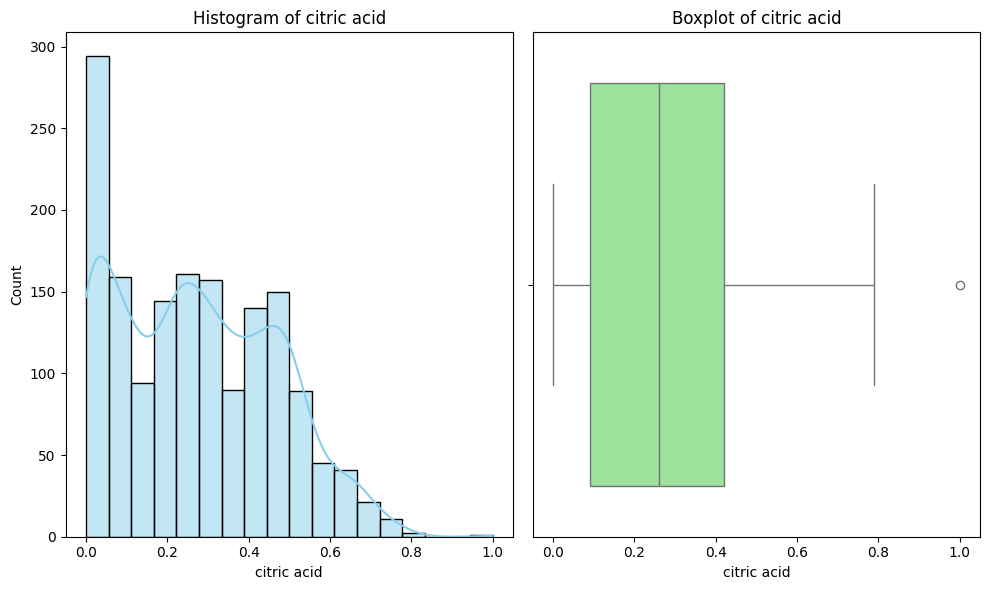

In [331]:
plot_distribution(df, 'citric acid')

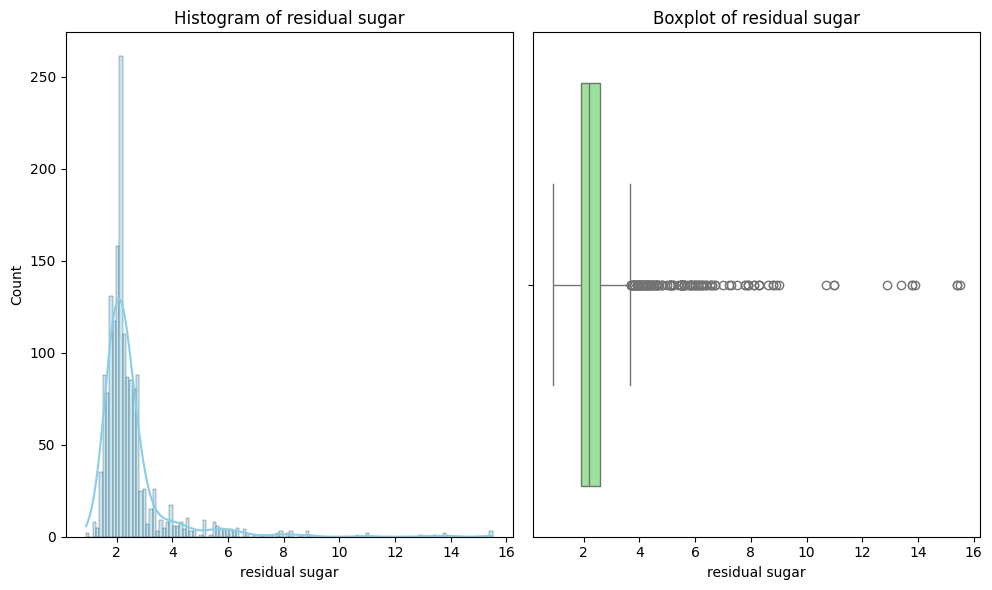

In [332]:
plot_distribution(df, 'residual sugar')

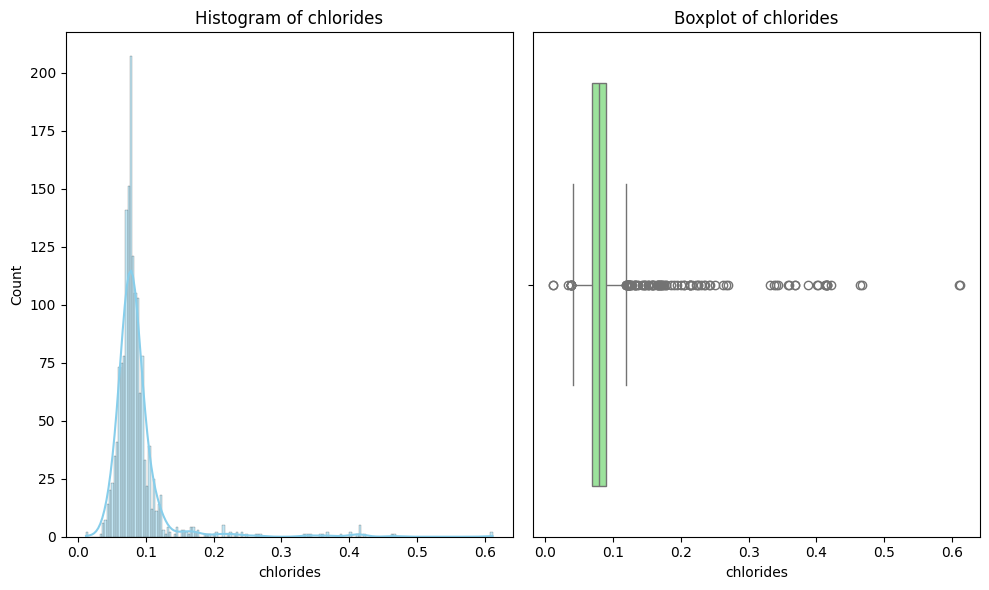

In [333]:
plot_distribution(df, 'chlorides')

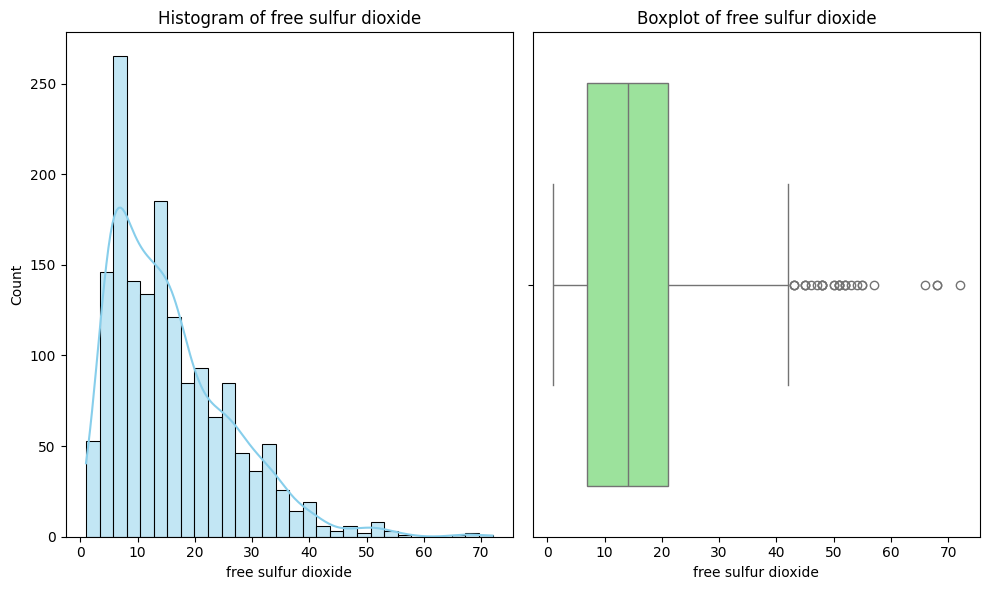

In [334]:
plot_distribution(df, 'free sulfur dioxide')

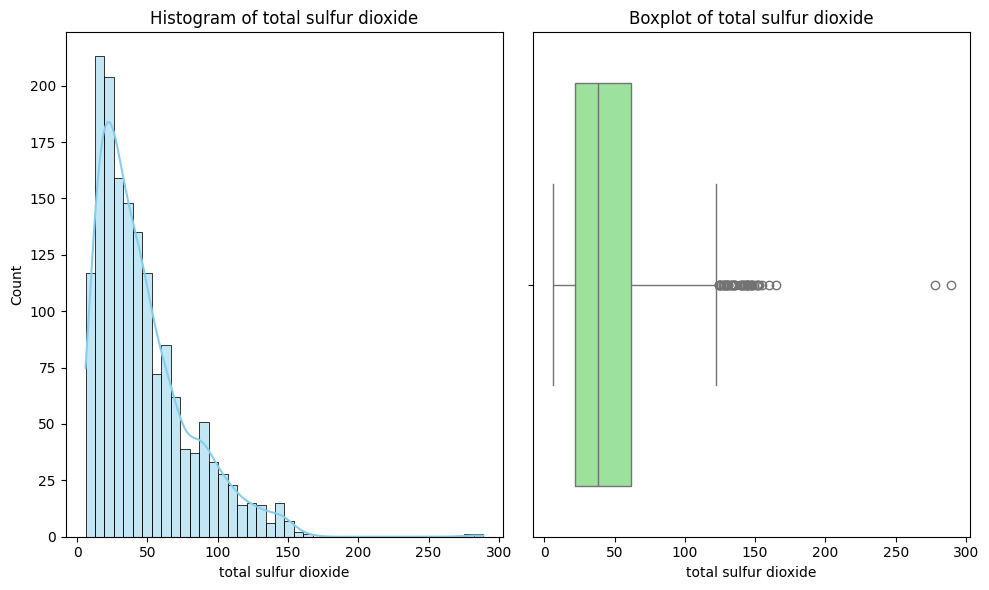

In [335]:
plot_distribution(df, 'total sulfur dioxide')

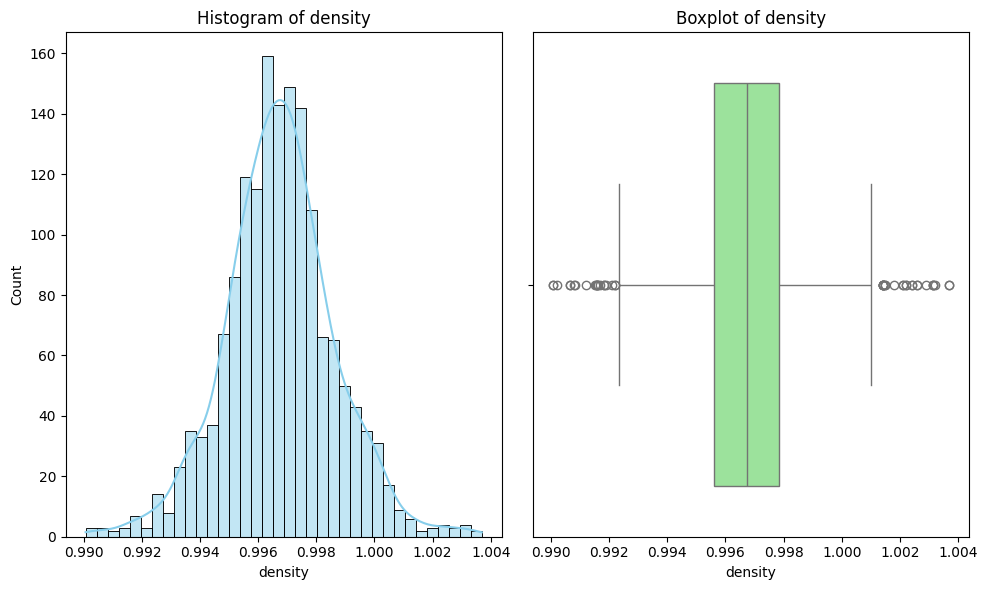

In [336]:
plot_distribution(df, 'density')

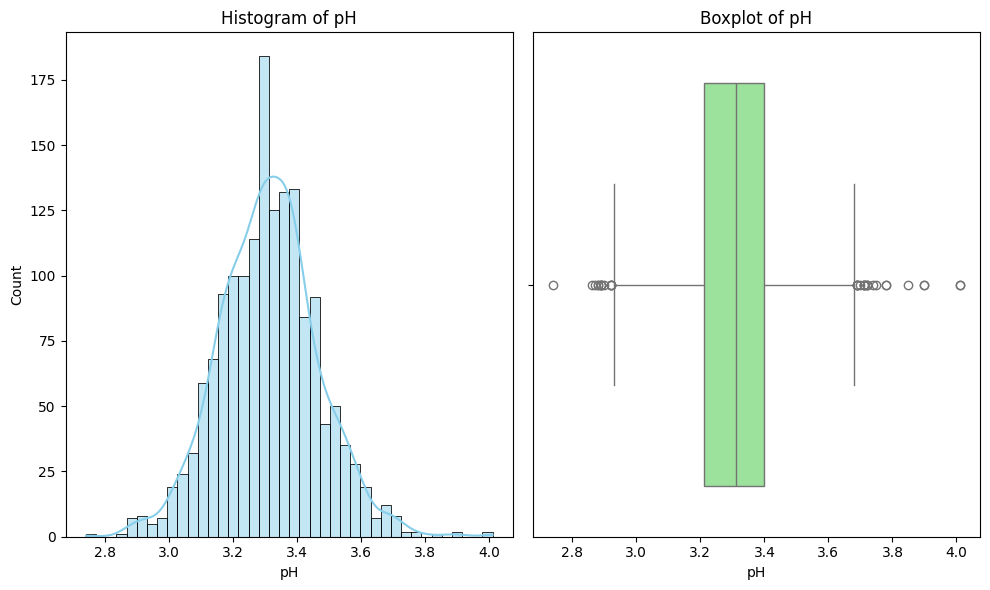

In [337]:
plot_distribution(df, 'pH')

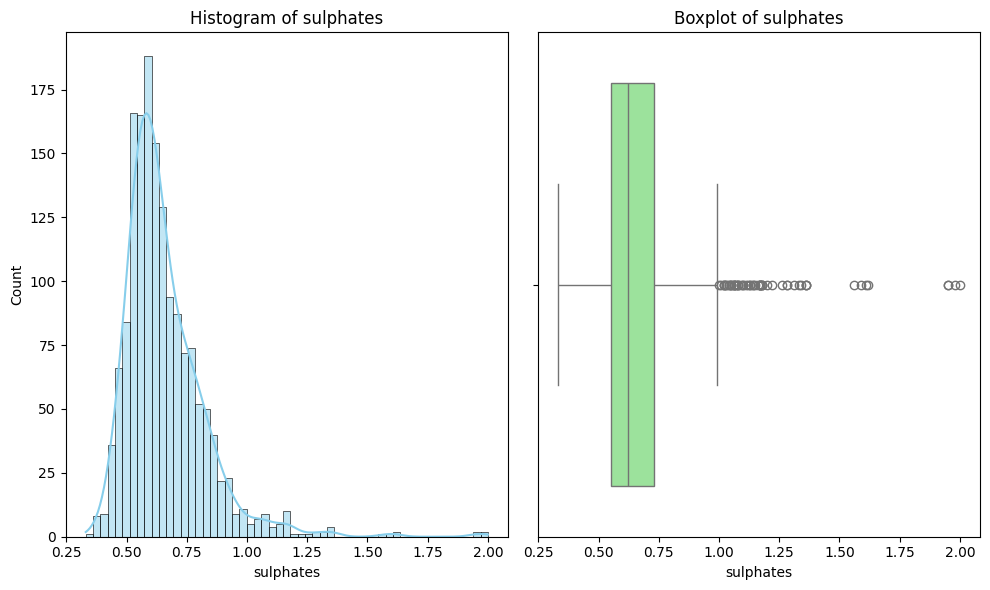

In [338]:
plot_distribution(df, 'sulphates')

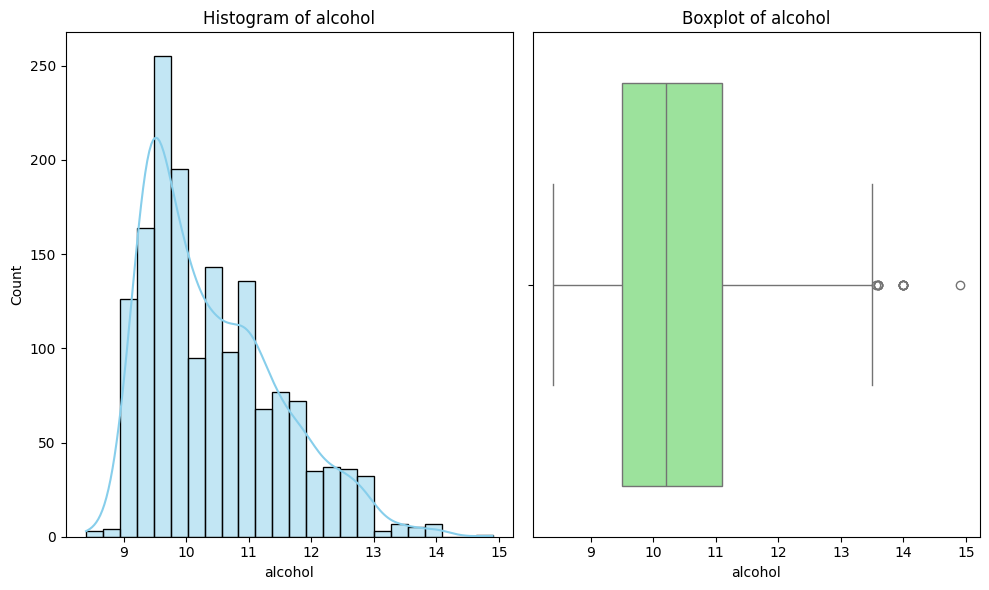

In [339]:
plot_distribution(df, 'alcohol')

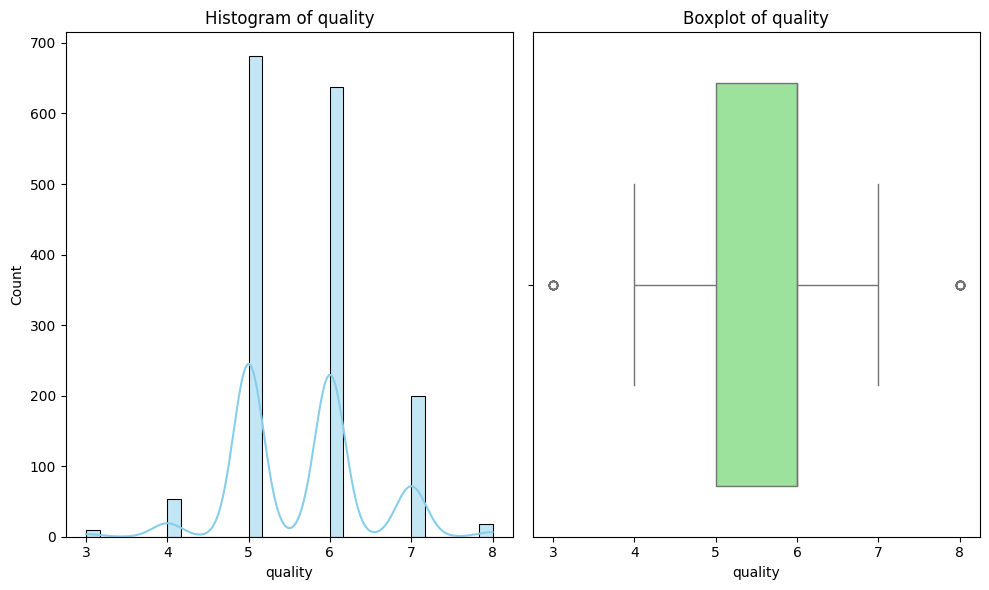

In [340]:
plot_distribution(df, 'quality')

In [421]:
def clip_outliers(df, columns, lower_quantile=0.01, upper_quantile=0.95):
    for col in columns:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

In [422]:
colum_list = list(df.columns)
colum_list.remove('quality')

In [423]:
df = clip_outliers(df, colum_list)

In [424]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.271545,0.521989,0.267192,2.424265,0.081559,15.457473,45.288931,0.996707,3.307398,0.647098,10.399364,5.636023
std,1.602938,0.162912,0.187080,0.866325,0.018550,9.277619,29.333212,0.001756,0.143445,0.129436,0.999975,0.807569
min,5.200000,0.190000,0.000000,1.400000,0.042980,3.000000,8.000000,0.991820,2.930000,0.420000,9.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,11.800000,0.840000,0.600000,5.100000,0.126100,35.000000,112.100000,1.000000,3.570000,0.930000,12.500000,8.000000


In [345]:
pct = np.percentile(df.loc[:, 'residual sugar'].fillna(np.mean(df.loc[:, 'residual sugar'])), 99)
print(pct)
#df = df.loc[df.loc[:, 'age'] < pct]

5.1


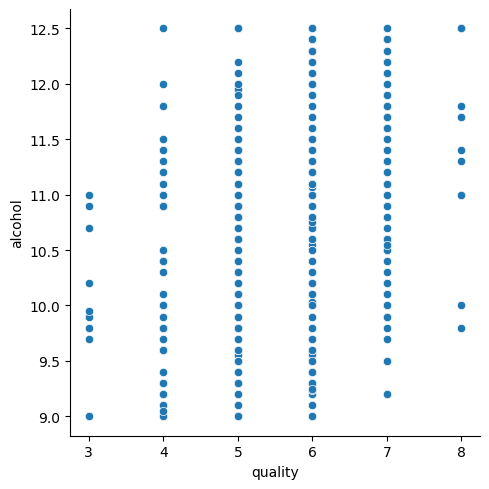

In [346]:
sns.relplot(x="quality", y="alcohol", data=df)
#sns.lmplot(x="capital-gain", y="salary", hue="sex", data=df);

### Drop rows

In [122]:
print(df.shape)
df = df.dropna(axis=1) #axis=0 is row, axis=1 is column
print(df.shape)

(1599, 12)
(1599, 12)


In [347]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Snipping 95% capital gain, loss

### Select only numerical columns to make correlation matrix

   volatile acidity  citric acid  total sulfur dioxide  density    pH  \
0              0.70         0.00                  34.0   0.9978  3.51   
1              0.84         0.00                  67.0   0.9968  3.20   
2              0.76         0.04                  54.0   0.9970  3.26   
3              0.28         0.56                  60.0   0.9980  3.16   
4              0.70         0.00                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  volatile_acidity_to_alcohol  total_acidity  \
0       0.56      9.4        5                     0.074468           8.10   
1       0.68      9.8        5                     0.085714           8.64   
2       0.65      9.8        5                     0.077551           8.56   
3       0.58      9.8        6                     0.028571          11.48   
4       0.56      9.4        5                     0.074468           8.10   

   acidity_to_ph_ratio  volatile_to_total_acidity  free_to_total_sulfur_ratio  \
0          

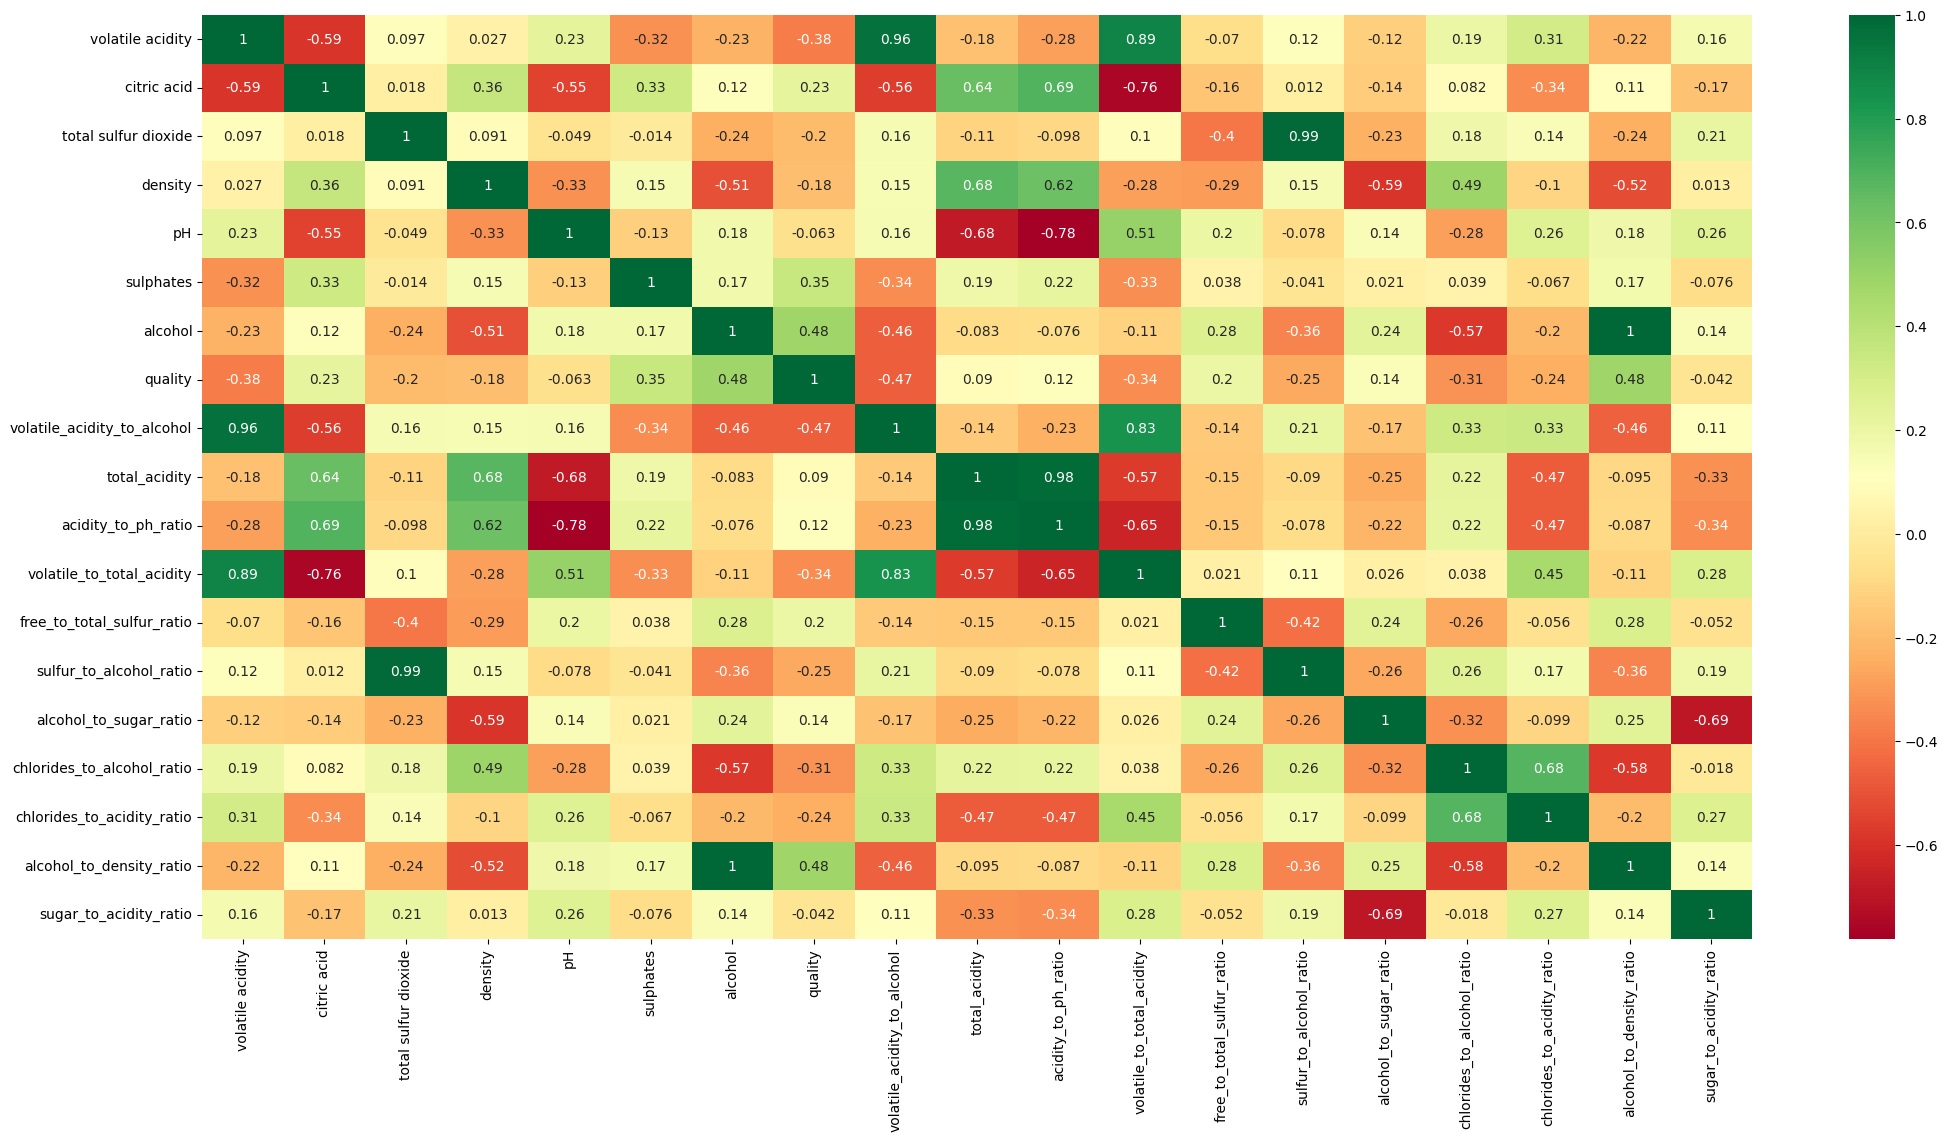

In [472]:
# Select only numerical columns to make correlation matrix

numerical_df = df.select_dtypes(include=[np.number])

numerical_cols = numerical_df.columns

print(numerical_df.head())

print("Numerical Columns:")
print(numerical_df.columns.tolist())
corrmat = numerical_df.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
g=sns.heatmap(numerical_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")   #plot heat map

In [436]:
columns_to_remove = ['high_quality']

In [437]:
df = df.drop(columns=columns_to_remove)

In [434]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile_to_total_acidity,free_to_total_sulfur_ratio,sulfur_to_alcohol_ratio,alcohol_to_sugar_ratio,chlorides_to_alcohol_ratio,chlorides_to_acidity_ratio,alcohol_to_density_ratio,sugar_to_acidity_ratio,high_quality,low_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.086420,0.323529,3.617021,4.947368,0.008085,0.010270,9.420726,0.256757,0,0
1,7.8,0.84,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.097222,0.373134,6.836735,3.769231,0.010000,0.012564,9.831461,0.333333,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.088785,0.277778,5.510204,4.260870,0.009388,0.011795,9.829488,0.294872,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.024390,0.283333,6.122449,5.157895,0.007653,0.006696,9.819639,0.169643,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.086420,0.323529,3.617021,4.947368,0.008085,0.010270,9.420726,0.256757,0,0


In [425]:
def create_wine_features(df):
    df['volatile_acidity_to_alcohol'] = df['volatile acidity'] / df['alcohol']
    df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
    df['acidity_to_ph_ratio'] = df['fixed acidity'] / df['pH']
    df['volatile_to_total_acidity'] = df['volatile acidity'] / df['total_acidity']
    df['free_to_total_sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
    df['sulfur_to_alcohol_ratio'] = df['total sulfur dioxide'] / df['alcohol']
    df['alcohol_to_sugar_ratio'] = df['alcohol'] / df['residual sugar']
    df['chlorides_to_alcohol_ratio'] = df['chlorides'] / df['alcohol']
    df['chlorides_to_acidity_ratio'] = df['chlorides'] / df['fixed acidity']
    df['alcohol_to_density_ratio'] = df['alcohol'] / df['density']
    df['sugar_to_acidity_ratio'] = df['residual sugar'] / df['fixed acidity']
    df['low_quality'] = ((df['volatile acidity'] > 0.7) | (df['total sulfur dioxide'] > 100)).astype(int)
    return df



In [426]:
df = create_wine_features(df)

In [374]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,acidity_to_ph_ratio,volatile_to_total_acidity,free_to_total_sulfur_ratio,sulfur_to_alcohol_ratio,alcohol_to_sugar_ratio,chlorides_to_alcohol_ratio,chlorides_to_acidity_ratio,alcohol_to_density_ratio,sugar_to_acidity_ratio,low_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,2.108262,0.086420,0.323529,3.617021,4.947368,0.008085,0.010270,9.420726,0.256757,0
1,7.8,0.84,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,2.437500,0.097222,0.373134,6.836735,3.769231,0.010000,0.012564,9.831461,0.333333,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,2.392638,0.088785,0.277778,5.510204,4.260870,0.009388,0.011795,9.829488,0.294872,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,3.544304,0.024390,0.283333,6.122449,5.157895,0.007653,0.006696,9.819639,0.169643,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,2.108262,0.086420,0.323529,3.617021,4.947368,0.008085,0.010270,9.420726,0.256757,0


In [438]:
df = df.drop(columns=['low_quality', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'chlorides'])

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volatile acidity             1599 non-null   float64
 1   citric acid                  1599 non-null   float64
 2   total sulfur dioxide         1599 non-null   float64
 3   density                      1599 non-null   float64
 4   pH                           1599 non-null   float64
 5   sulphates                    1599 non-null   float64
 6   alcohol                      1599 non-null   float64
 7   quality                      1599 non-null   int64  
 8   volatile_acidity_to_alcohol  1599 non-null   float64
 9   total_acidity                1599 non-null   float64
 10  acidity_to_ph_ratio          1599 non-null   float64
 11  volatile_to_total_acidity    1599 non-null   float64
 12  free_to_total_sulfur_ratio   1599 non-null   float64
 13  sulfur_to_alcohol_

In [377]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname != 'quality']
numerical_cols

['volatile acidity',
 'citric acid',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'volatile_acidity_to_alcohol',
 'total_acidity',
 'acidity_to_ph_ratio',
 'volatile_to_total_acidity',
 'free_to_total_sulfur_ratio',
 'sulfur_to_alcohol_ratio',
 'alcohol_to_sugar_ratio',
 'chlorides_to_alcohol_ratio',
 'chlorides_to_acidity_ratio',
 'alcohol_to_density_ratio',
 'sugar_to_acidity_ratio']

In [460]:
# Separate target from predictors
y = df.quality
X = df.drop(['quality'], axis=1)

vmap = {
    3:0,
    4:1, 
    5:2,
    6:3,
    7:4,
    8:5
}
y = y.map(vmap)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
#categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 20 and 
#                    X_train[cname].dtype == "object"]#, "string"]]# | X_train[cname].dtype == "bool")]

categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 20 and 
                    (X_train[cname].dtype == "object" or X_train[cname].dtype == "bool")]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64'] and cname != 'quality']

# Keep selected columns only
#my_cols = categorical_cols + numerical_cols
#X_train = X_train_full[my_cols].copy()
#X_valid = X_valid_full[my_cols].copy()

In [461]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.ensemble import BalancedRandomForestClassifier

In [462]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [362]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

In [380]:
from sklearn.metrics import f1_score

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return f1_score(y_valid, preds, average='weighted')  # or average='macro'

## Instantiate pipeline

In [473]:
numerical_cols

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'volatile_acidity_to_alcohol',
       'total_acidity', 'acidity_to_ph_ratio', 'volatile_to_total_acidity',
       'free_to_total_sulfur_ratio', 'sulfur_to_alcohol_ratio',
       'alcohol_to_sugar_ratio', 'chlorides_to_alcohol_ratio',
       'chlorides_to_acidity_ratio', 'alcohol_to_density_ratio',
       'sugar_to_acidity_ratio'],
      dtype='object')

In [474]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Step 1: Impute missing values with the mean
    ('scaler', StandardScaler())                    # Step 2: Scale features to [0, 1] range
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

## Model

In [475]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [300]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=0)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [476]:
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=0)
svm_model = SVC(class_weight='balanced', kernel='rbf', C=1.0, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Bundle preprocessing and modeling code in a pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])

# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = rf_pipe.predict(X_valid)

# Evaluate the model
score = f1_score(y_valid, preds, average='weighted')
print('F1:', score)

ValueError: A given column is not a column of the dataframe

In [464]:
y

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64

In [477]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight='balanced', 
                          n_estimators=200, 
                          random_state=0)

# Bundle preprocessing and modeling code in a pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_model)
                             ])

# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = rf_pipe.predict(X_valid)

# Evaluate the model
score = f1_score(y_valid, preds, average='weighted')
print('F1:', score)

ValueError: A given column is not a column of the dataframe

In [467]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Stratified cross-validation with F1 score
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf_pipe, X_train, y_train, cv=strat_kfold, scoring='f1_weighted')  # Use 'f1_macro' for macro F1-score

print("Stratified Cross-validation F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())

C:\Users\49176\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\49176\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\49176\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not u

Stratified Cross-validation F1 scores: [0.62725738 0.63081067 0.63559805 0.629676   0.62604989]
Mean F1 score: 0.629878397852442


In [202]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf_pipe, param_grid, cv=strat_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters found: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best cross-validation score: 0.6739583333333333


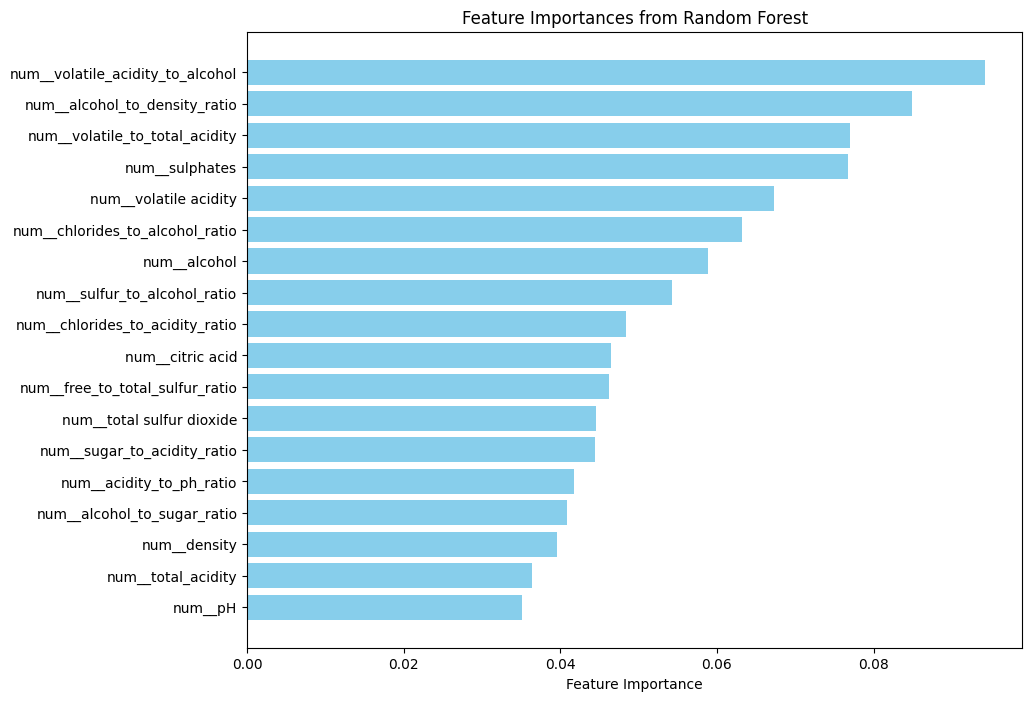

In [471]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names after preprocessing
feature_names = rf_pipe.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [395]:
y_valid.describe()

count    320.000000
mean       5.593750
std        0.757796
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

In [391]:
cm = confusion_matrix(y_valid, preds)
cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   7,   4,   0,   0],
       [  0,   0, 114,  20,   1,   0],
       [  0,   0,  25, 108,   9,   0],
       [  0,   0,   1,   7,  17,   2],
       [  0,   0,   0,   1,   2,   0]])

Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 114  20   1   0]
 [  0   0  25 108   9   0]
 [  0   0   1   7  17   2]
 [  0   0   0   1   2   0]]


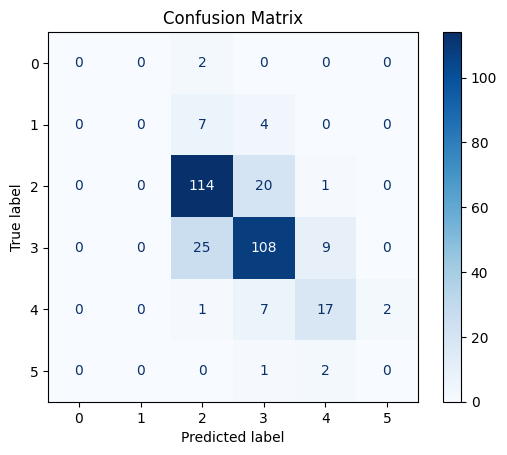

In [392]:
cm = confusion_matrix(y_valid, preds)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose other color maps like 'viridis', 'plasma', etc.
plt.title('Confusion Matrix')
plt.show()

In [148]:
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


ValueError: too many values to unpack (expected 4)

In [232]:
df.describe().round()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,gain-loss-sum,is_married,hours_squared
count,29244.0,29244.0,29244.0,29244.0,29244.0,29244.0,29244.0,29244.0,29244.0,29244.0
mean,36.0,190714.0,10.0,92.0,91.0,41.0,0.0,1.0,0.0,20.0
std,12.0,106224.0,2.0,552.0,407.0,12.0,0.0,698.0,0.0,6.0
min,17.0,12285.0,1.0,0.0,0.0,1.0,0.0,-3900.0,0.0,0.0
25%,27.0,118310.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,20.0
50%,36.0,179546.0,10.0,0.0,0.0,40.0,0.0,0.0,0.0,20.0
75%,45.0,238476.0,12.0,0.0,0.0,45.0,0.0,0.0,1.0,22.0
max,62.0,1484705.0,16.0,4687.0,3900.0,99.0,1.0,4687.0,1.0,50.0


### Feature Importance

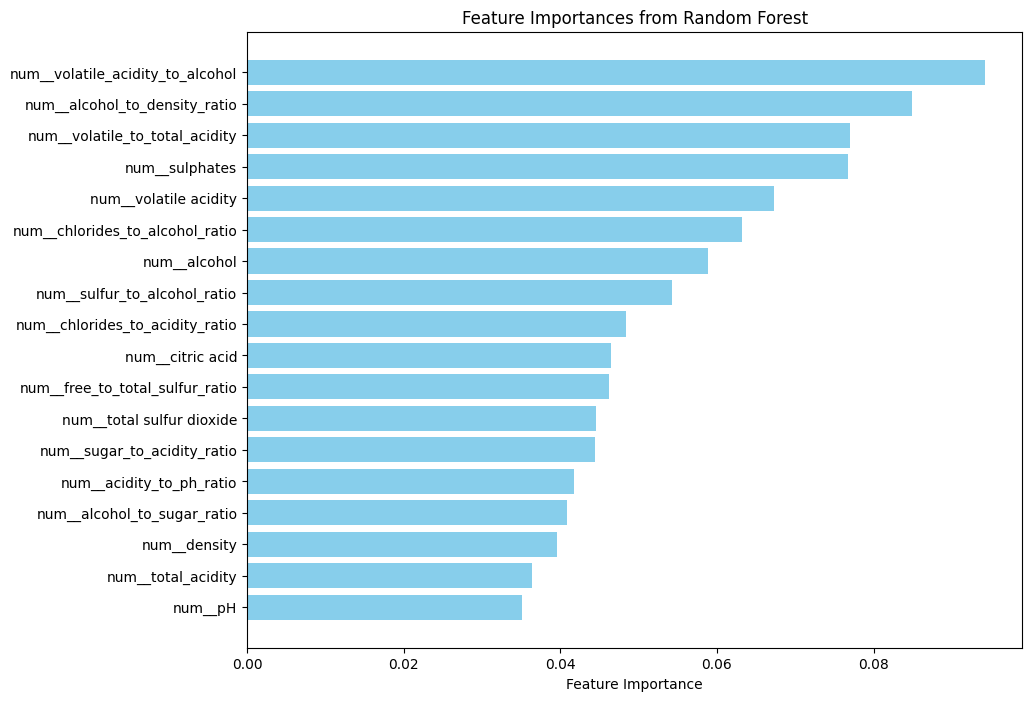

In [406]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names after preprocessing
feature_names = rf_pipe.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

### Adding more features

In [ ]:
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]
